<a href="https://colab.research.google.com/github/pankjb/Data-Science/blob/main/5_Car_Price_Prediction_Linear_Regression_%26_LASSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Dependencies

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [2]:
car_data = pd.read_csv('/content/car data.csv')
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
car_data.shape

(301, 9)

In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
#missing values?
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
#checking distribution of categorical data
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding Categorical Data



In [15]:
#encoding Fuel_Type Column
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}}, inplace = True )
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}}, inplace = True)
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}}, inplace = True)

#When inplace = True , data is modified in place, ie it will return nothing and the dataframe is now updated. 
#When inplace = False , which is the default, then the operation is performed and it returns a copy of the object. 
#in case of False You then need to save it to something.

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [14]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting Data Into Training and Test Data

In [17]:
X = car_data.drop(['Car_Name', 'Selling_Price'], axis =1)
Y = car_data['Selling_Price']

In [18]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [19]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [20]:
print(X.shape, Y.shape)

(301, 7) (301,)


Splitting Training and Test Data

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)
print(X_train.shape, X_test.shape)

(240, 7) (61, 7)


1. Linear Regression Model

In [22]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

Model Prediction

In [25]:
training_data_prediction = lin_reg_model.predict(X_train)


In [27]:
#R2 error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print('R square error is: ', error_score)

R square error is:  0.8838169193709796


Visualise actual prices and Predicted prices

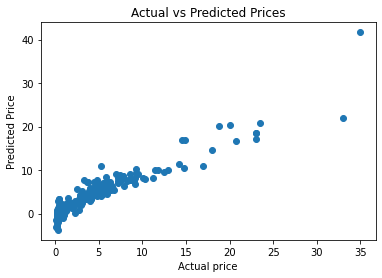

In [30]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

Test Data Prediction

In [33]:
test_data_prediction = lin_reg_model.predict(X_test)

#error in test data prediction
Test_error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R2 error in test data is:', Test_error_score)

R2 error in test data is: 0.8401532365377697


Plot test error and prediction

<function matplotlib.pyplot.show(*args, **kw)>

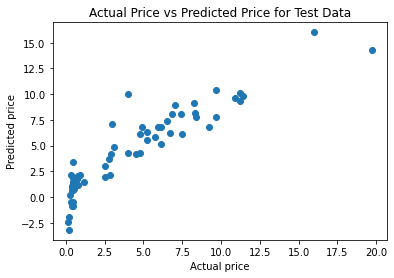

In [34]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual Price vs Predicted Price for Test Data')
plt.show

2. Lasso Regression Model

In [36]:
lasso_reg_model = Lasso()
lasso_reg_model.fit(X_train, Y_train)

Lasso()

In [38]:
training_data_prediction2 = lasso_reg_model.predict(X_train)
#R2 error
error_score = metrics.r2_score(Y_train, training_data_prediction2)
print('R square error is: ', error_score)

R square error is:  0.843587395258283


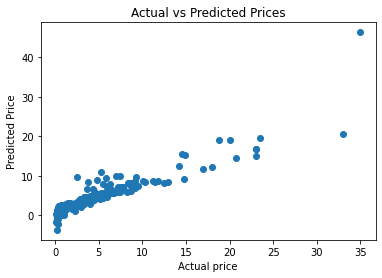

In [39]:
plt.scatter(Y_train, training_data_prediction2)
plt.xlabel('Actual price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

In [40]:
test_data_prediction2 = lasso_reg_model.predict(X_test)

#error in test data prediction
Test_error_score = metrics.r2_score(Y_test, test_data_prediction2)
print('R2 error in test data is:', Test_error_score)

R2 error in test data is: 0.8497457570738539


<function matplotlib.pyplot.show(*args, **kw)>

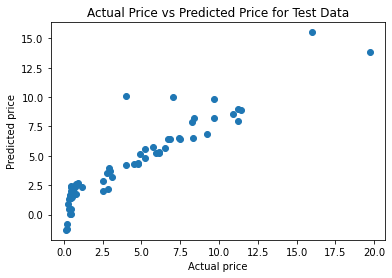

In [41]:
plt.scatter(Y_test, test_data_prediction2)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual Price vs Predicted Price for Test Data')
plt.show